# Customer Segmentation and Clustering Analysis

This project involves customer segmentation using clustering techniques. The dataset used contains information on customer demographics and purchasing behavior, and the goal is to group customers into distinct clusters based on their similarity.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("~/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis
In this section, I explore the dataset through univariate and bivariate analysis.

## Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


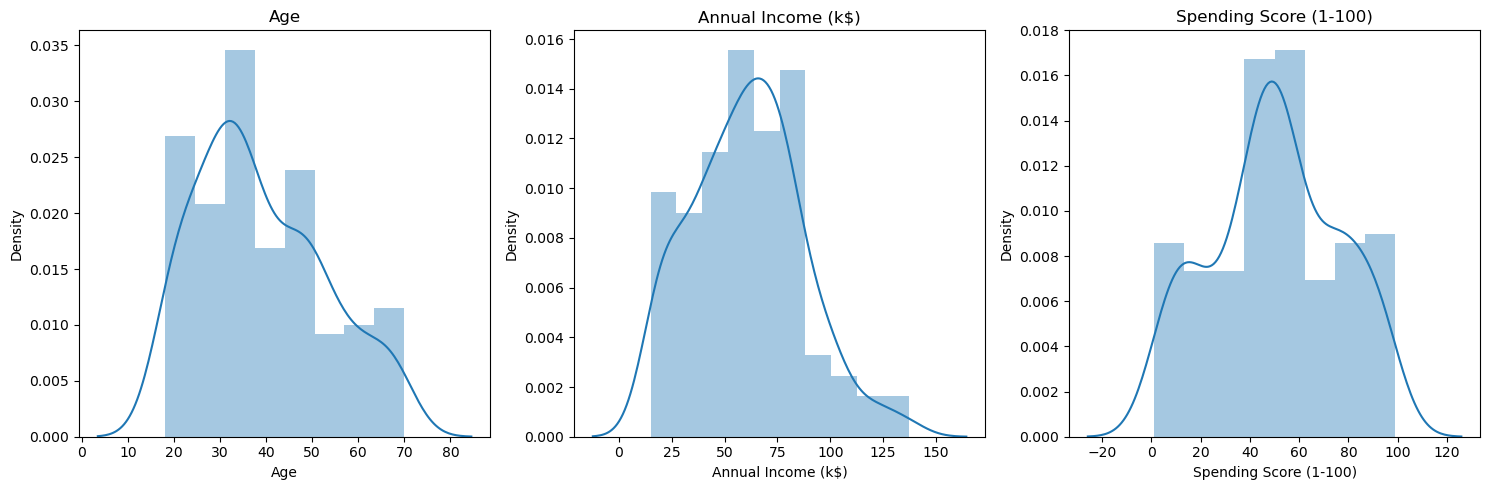

In [5]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

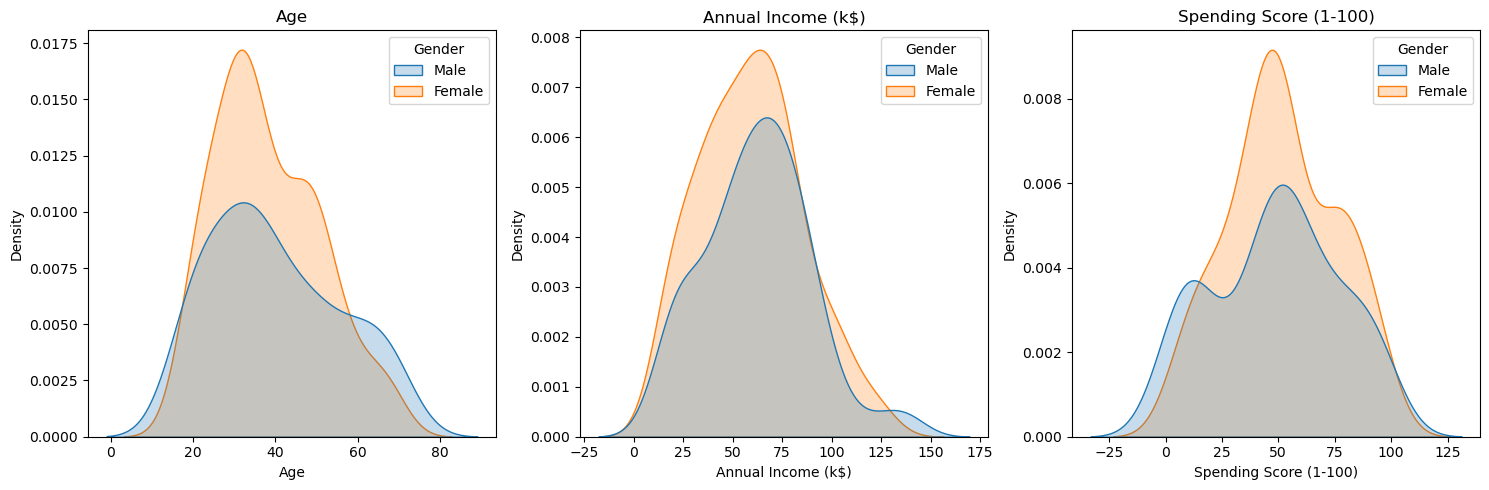

In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

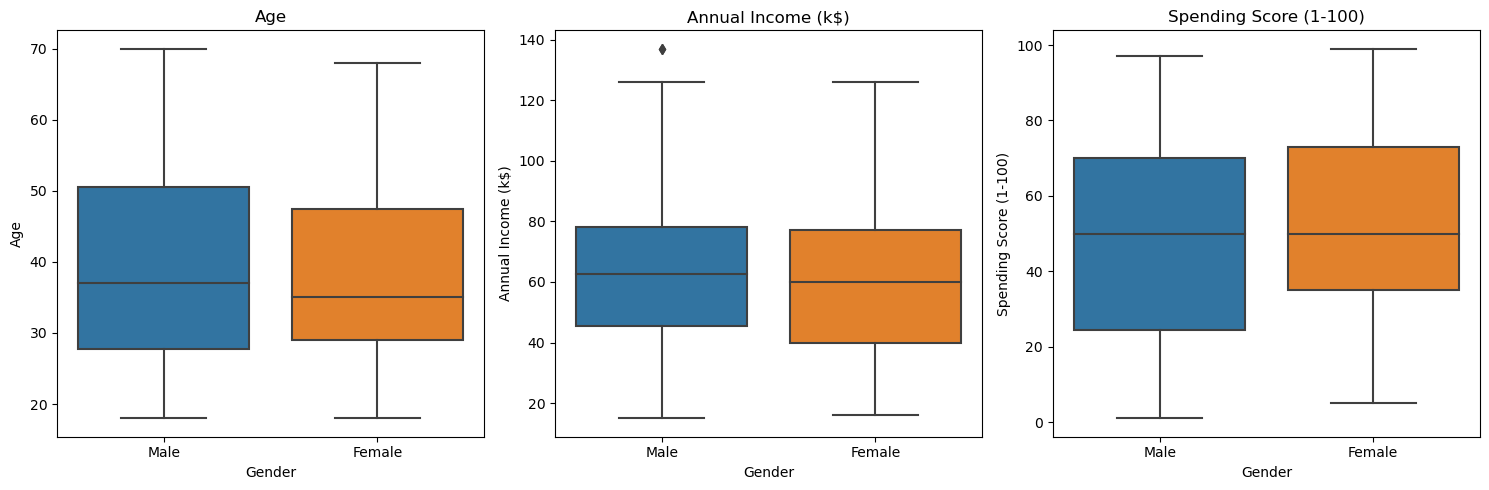

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):
    sns.boxplot(data=df, x='Gender', y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

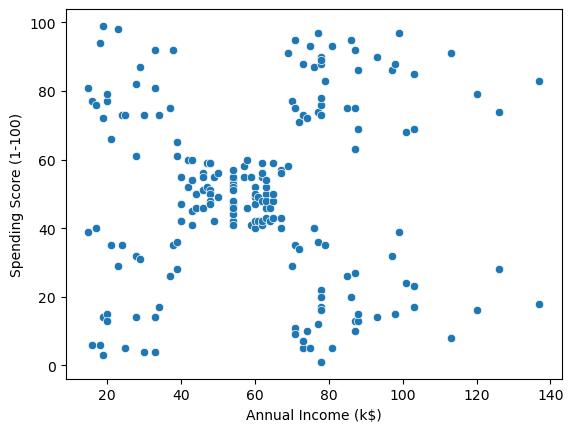

In [9]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)");

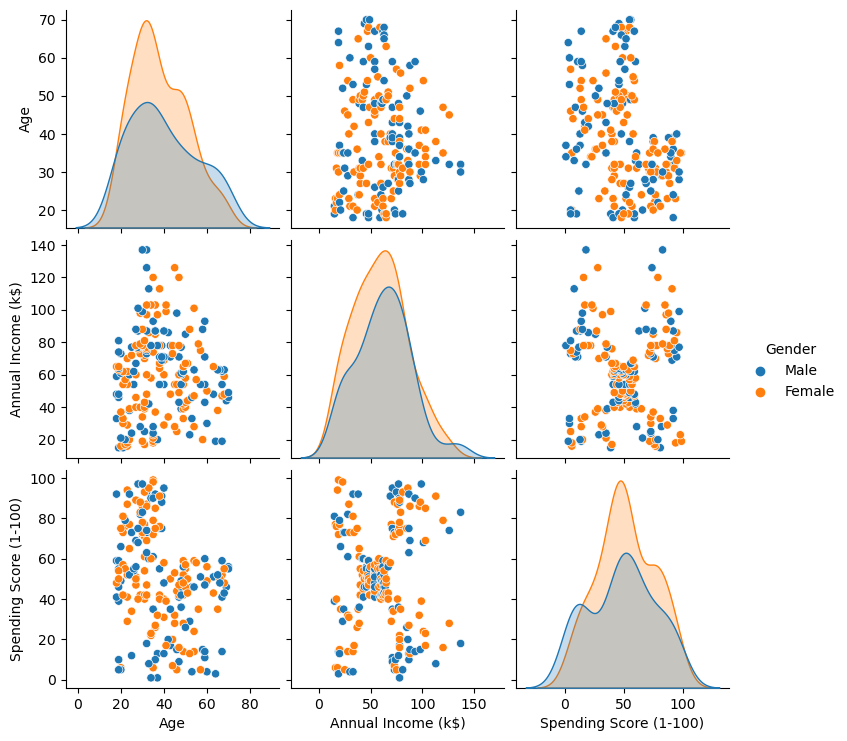

In [10]:
df = df.drop("CustomerID", axis=1)
sns.pairplot(df, hue="Gender");

In [11]:
df.groupby("Gender")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

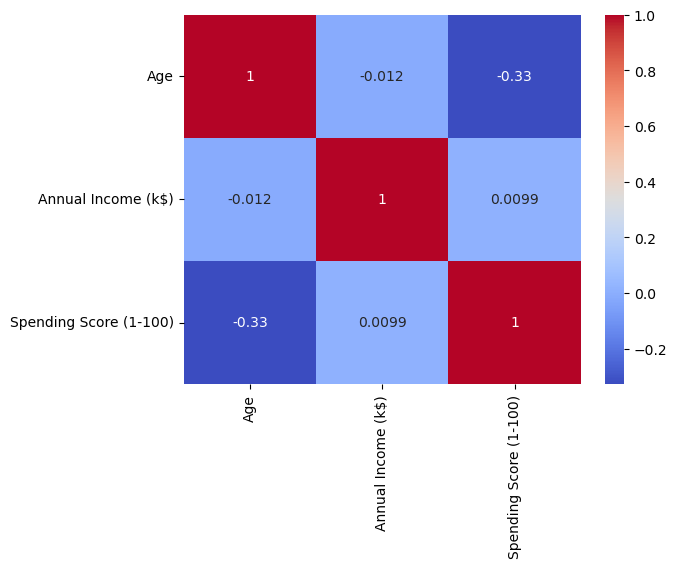

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Clustering - Univariate, Bivariate, Multivariate

### Univariate Clustering

In [13]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

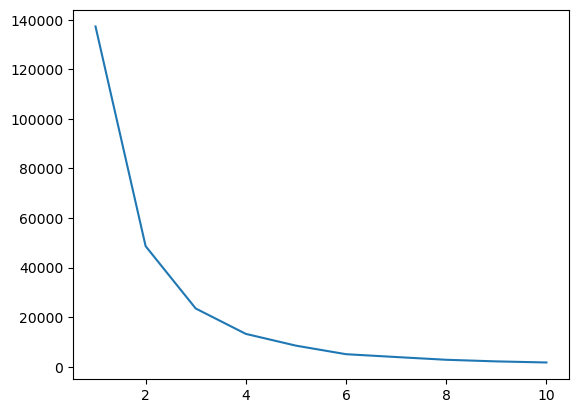

In [14]:
plt.plot(range(1,11),inertia_scores)

In [15]:
clustering1 = KMeans(n_clusters=3)

In [16]:
clustering1.fit(df[['Annual Income (k$)']]);

In [17]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [18]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [19]:
clustering1.inertia_

23517.330930930933

### Bivariate Clustering

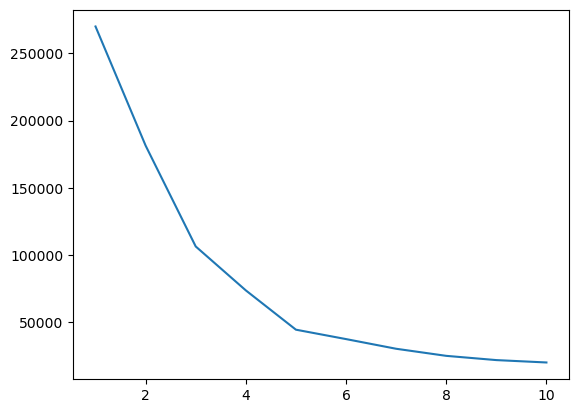

In [20]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [21]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df["Spending & Income Cluster"] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,3
2,Female,20,16,6,1,2
3,Female,23,16,77,1,3
4,Female,31,17,40,1,2


In [22]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

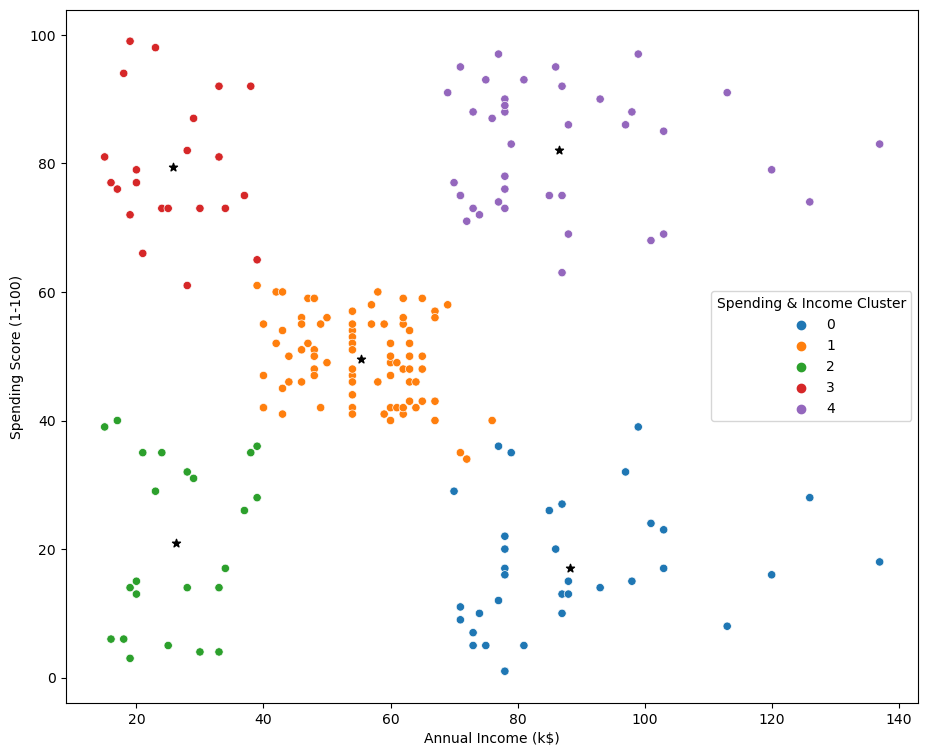

In [23]:
plt.figure(figsize=(11,9))
plt.scatter(x = centers["x"], y = centers["y"], c="black", marker="*")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Spending & Income Cluster", palette='tab10');

In [24]:
pd.crosstab(df['Spending & Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [25]:
df.groupby("Spending & Income Cluster")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


### Multivariate Clustering

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
dff = pd.get_dummies(df, drop_first=True)
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [29]:
dff = pd.DataFrame(scaler.fit_transform(dff))

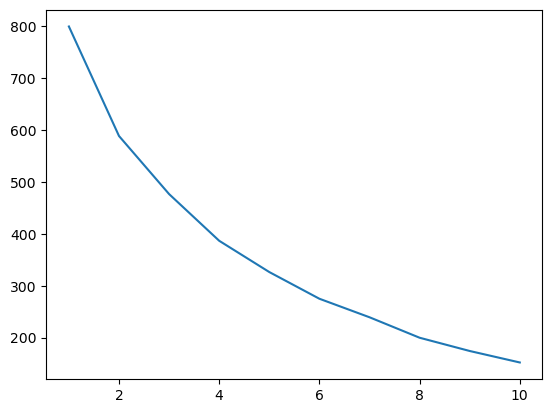

In [30]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

## Conclusion & Analysis

### Key Clustering Results:
Using **K-Means clustering**, I identified **5 distinct customer segments** based on **Spending Score and Annual Income**. The analysis provided valuable insights into customer behavior, allowing me to segment customers into **high-spending, high-income groups**, as well as other categories that represent different spending and income levels.

### Target Cluster - Cluster 4:
**Cluster 4** was identified as the key target group for marketing efforts. This cluster represents **customers with high annual incomes and high spending scores**, making them an ideal audience for **premium products and exclusive services**.

### Strategic Recommendations:
- **Marketing Strategy**: Tailor campaigns to offer **premium or exclusive items** to Cluster 4, emphasizing **quality, luxury, and personalized services**. This could include targeting this group with high-end products and loyalty programs that reward high spenders.
- **Loyalty Programs**: Introducing a **VIP or loyalty program** specifically for this high-spending group could drive even greater customer retention and lifetime value.

### Additional Opportunities:
**Cluster 3** presents an interesting opportunity to promote **budget-friendly items** through **seasonal sales events or promotions**. This cluster consists of customers with **lower income levels** but exhibits relatively high spending behavior, suggesting that well-targeted discounts or special promotions could significantly increase engagement with this group.

### Business Implications:
The insights gained from this clustering analysis have broader implications for how we approach **marketing and product development**. Understanding the spending behavior and demographic composition of the customer base allows for **more targeted and effective marketing strategies**. Future work could explore refining these clusters further or applying additional segmentation techniques to uncover deeper layers of customer behavior. Additionally, the introduction of targeted marketing and loyalty programs can result in increased customer satisfaction and retention.
